In [ ]:
import numpy as np

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('placement.csv')

In [ ]:
df

,Unnamed: 0,cgpa,iq,placement
0,0,6.69,131.0,0
1,1,9.28,87.0,0
2,2,8.29,93.0,0
3,3,7.69,152.0,1
4,4,5.70,129.0,0
...,...,...,...,...
195,195,6.57,154.0,0
196,196,8.27,149.0,1
197,197,9.04,114.0,1
198,198,8.99,140.0,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       200 non-null    float64
 1   iq         200 non-null    float64
 2   placement  200 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 4.8 KB


In [12]:
import matplotlib.pyplot as plt


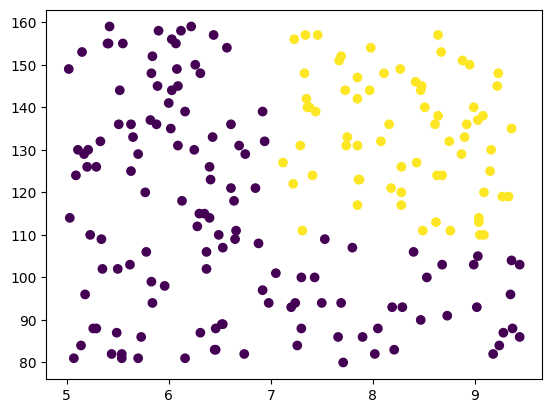

In [14]:
plt.scatter(df['cgpa'],df['iq'], c=df['placement'])

In [20]:
x = df.iloc[:,0:2]
y = df.iloc[:, -1]

In [19]:
x

,iq
0,131.0
1,87.0
2,93.0
3,152.0
4,129.0
...,...
195,154.0
196,149.0
197,114.0
198,140.0


In [21]:
from sklearn.model_selection import train_test_split

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.1)

In [24]:
x_test

,cgpa,iq
95,7.22,122.0
70,8.48,145.0
45,7.98,154.0
132,5.54,81.0
68,5.34,109.0
55,9.15,125.0
112,9.18,82.0
139,9.37,88.0
195,6.57,154.0
8,7.71,80.0


In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()

In [27]:
x_train = scaler.fit_transform(x_train)

In [28]:
x_train

array([[ 0.30214224, -0.50913595],
       [-0.01244717,  0.26314892],
       [ 0.50931088, -0.59494538],
       [ 0.45560049,  0.99252907],
       [-1.48564636,  0.2202442 ],
       [-1.04829035, -0.03718409],
       [ 1.44540619, -1.19561138],
       [-1.3245152 ,  1.46448093],
       [-1.24011316,  0.99252907],
       [-1.2631319 , -1.45303967],
       [-0.51885939, -1.62465853],
       [ 0.22541312, -0.89527838],
       [ 0.16402982,  0.90671964],
       [-0.94854249,  1.59319507],
       [ 1.46842493, -0.46623123],
       [-0.30401784, -1.66756324],
       [ 1.59886444,  1.03543378],
       [-1.58539422, -1.71046796],
       [-0.96388831,  0.64929135],
       [ 0.18704855,  0.82091021],
       [-0.63395308, -1.45303967],
       [-1.10200073, -1.71046796],
       [ 0.4632734 ,  0.43476778],
       [ 1.6986123 , -1.06689724],
       [-0.90250501, -0.98108781],
       [ 0.17170273,  0.82091021],
       [ 0.12566525, -0.89527838],
       [ 1.17685426,  1.3786715 ],
       [ 0.63975039,

In [29]:
x_test = scaler.transform(x_test)

In [30]:
x_test

array([[ 0.06428196,  0.04862534],
       [ 1.03106892,  1.03543378],
       [ 0.6474233 ,  1.42157621],
       [-1.22476733, -1.71046796],
       [-1.37822558, -0.50913595],
       [ 1.54515405,  0.17733949],
       [ 1.56817279, -1.66756324],
       [ 1.71395813, -1.41013496],
       [-0.43445735,  1.42157621],
       [ 0.44025466, -1.75337267],
       [ 1.637229  , -0.0800888 ],
       [ 1.42238746, -0.76656424],
       [-0.65697181, -0.3804218 ],
       [ 0.13333817, -0.42332652],
       [-0.64162599, -0.25170766],
       [-0.11986794, -1.15270667],
       [-0.81810297,  1.46448093],
       [ 1.49911658, -0.03718409],
       [ 1.55282697,  0.39186306],
       [-1.61608587, -0.29461237]])

In [31]:
from sklearn.linear_model import LogisticRegression

In [33]:
clf = LogisticRegression()

In [35]:
# model training
clf.fit(x_train, y_train)

LogisticRegression()

In [38]:
y_pred = clf.predict(x_test)

In [37]:
y_test

,placement
95,1
70,1
45,1
132,0
68,0
55,1
112,0
139,0
195,0
8,0


In [39]:
from sklearn.metrics import accuracy_score

In [40]:
accuracy_score(y_test, y_pred)

0.8

In [41]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

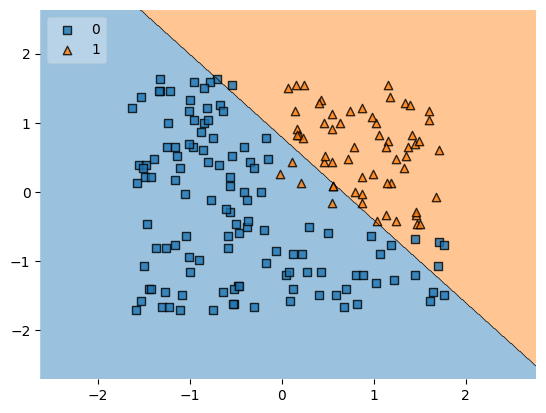

In [42]:
plot_decision_regions(x_train, y_train.values, clf=clf, legend = 2)

In [43]:
import pickle

In [44]:
pickle.dump(clf, open('placement_model.pkl', 'wb'))